In [27]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [28]:
given_lat= -20.296059
given_lon= -85.824539

In [29]:
date_column = np.empty((0,),dtype='datetime64')
conc_column = np.empty((0,),dtype='float64')

In [30]:
lon_index = int(((np.floor(given_lon/0.625) * 0.625) - (-180))/0.625)
lon_index = 0 if lon_index == 576 else lon_index
lat_index = int(((np.floor(given_lat/0.5) * 0.5) - (-90))/0.5)

In [31]:
# keep data files here
data_folder = os.listdir('../data/co2-data') 

In [32]:
for data_file in data_folder:
    data = xr.open_dataset(f"../data/co2-data/{data_file}")

    conc_data = np.array(data["XCO2"].values)[0]
    date_data = data.coords['time'].values
    
    date_val = date_data[0]
    conc_val = conc_data[lat_index][lon_index]

    date_column = np.append(date_column, date_val)
    conc_column = np.append(conc_column,conc_val)

In [33]:
date_column.shape

(731,)

In [34]:
conc_column.shape

(731,)

In [35]:
co2_df = pd.DataFrame({'conc' : conc_column}, index=date_column)
co2_df.index = pd.to_datetime(co2_df.index.strftime('%Y-%m-%d'),format='%Y-%m-%d')
co2_df

,conc
2020-02-01,0.000410
2020-02-02,0.000410
2020-02-03,0.000410
2020-02-04,0.000410
2020-02-05,0.000410
...,...
2022-01-27,0.000415
2022-01-28,0.000415
2022-01-29,0.000415
2022-01-30,0.000415


In [36]:
co2_df['datetime'] = co2_df.index.astype('str')
co2_df = co2_df[['datetime','conc']]
co2_df.reset_index(drop=True, inplace=True)
co2_df.columns=['ds','y']
co2_df

,ds,y
0,2020-02-01,0.000410
1,2020-02-02,0.000410
2,2020-02-03,0.000410
3,2020-02-04,0.000410
4,2020-02-05,0.000410
...,...,...
726,2022-01-27,0.000415
727,2022-01-28,0.000415
728,2022-01-29,0.000415
729,2022-01-30,0.000415


In [37]:
pro_model = Prophet(interval_width=0.95)

In [38]:
pro_model.fit(co2_df)

21:07:55 - cmdstanpy - INFO - Chain [1] start processing
21:07:55 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future_date = pro_model.make_future_dataframe(periods=60, freq='MS')
future_date.tail()

,ds
786,2026-09-01
787,2026-10-01
788,2026-11-01
789,2026-12-01
790,2027-01-01


In [40]:
forecast = pro_model.predict(future_date)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-01,0.00041,0.00041,0.000411
1,2020-02-02,0.00041,0.00041,0.000411
2,2020-02-03,0.00041,0.00041,0.000411
3,2020-02-04,0.00041,0.00041,0.000411
4,2020-02-05,0.00041,0.00041,0.000411


C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


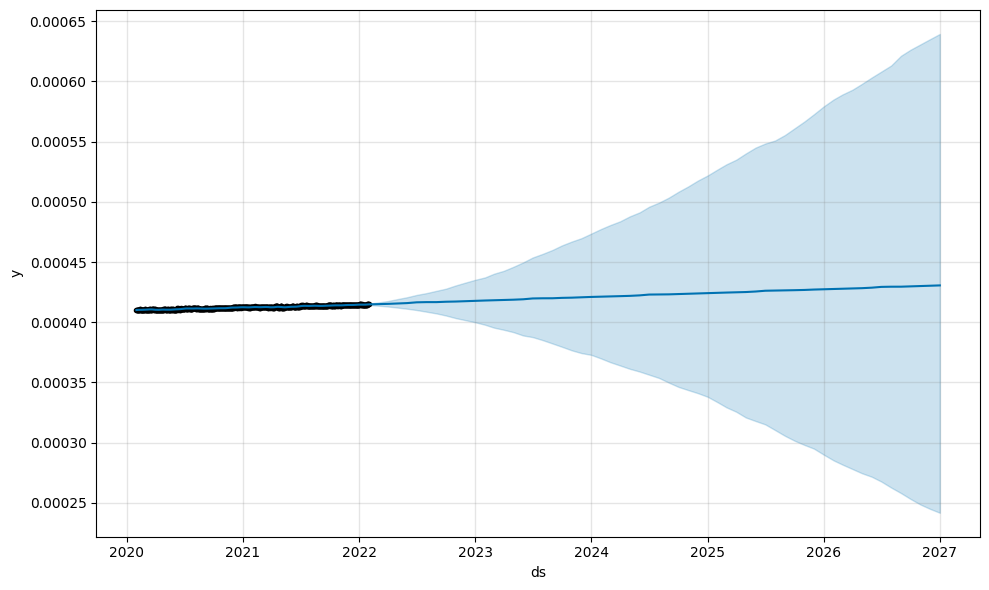

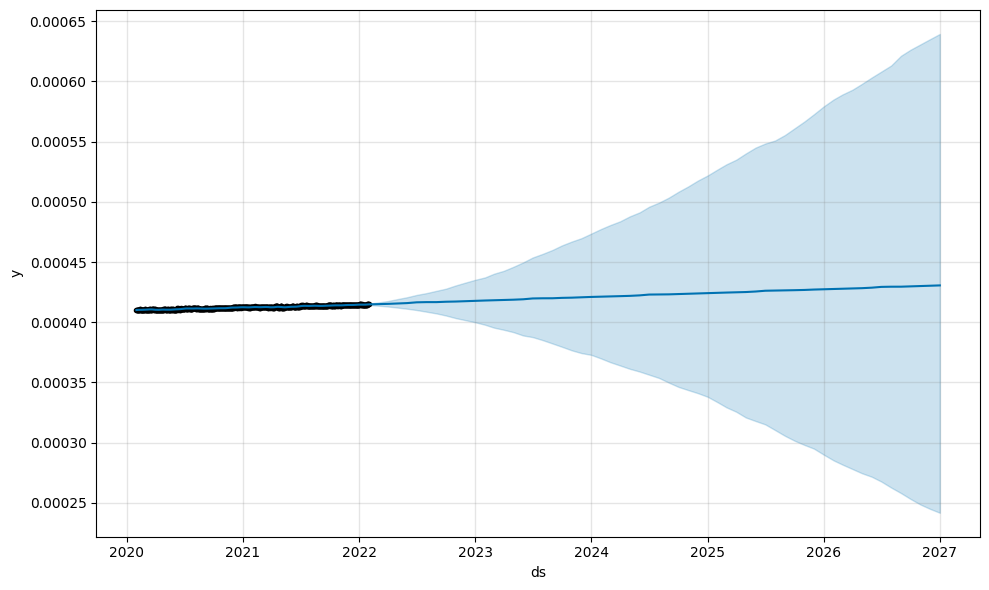

In [41]:
pro_model.plot(forecast, uncertainty=True)

C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is

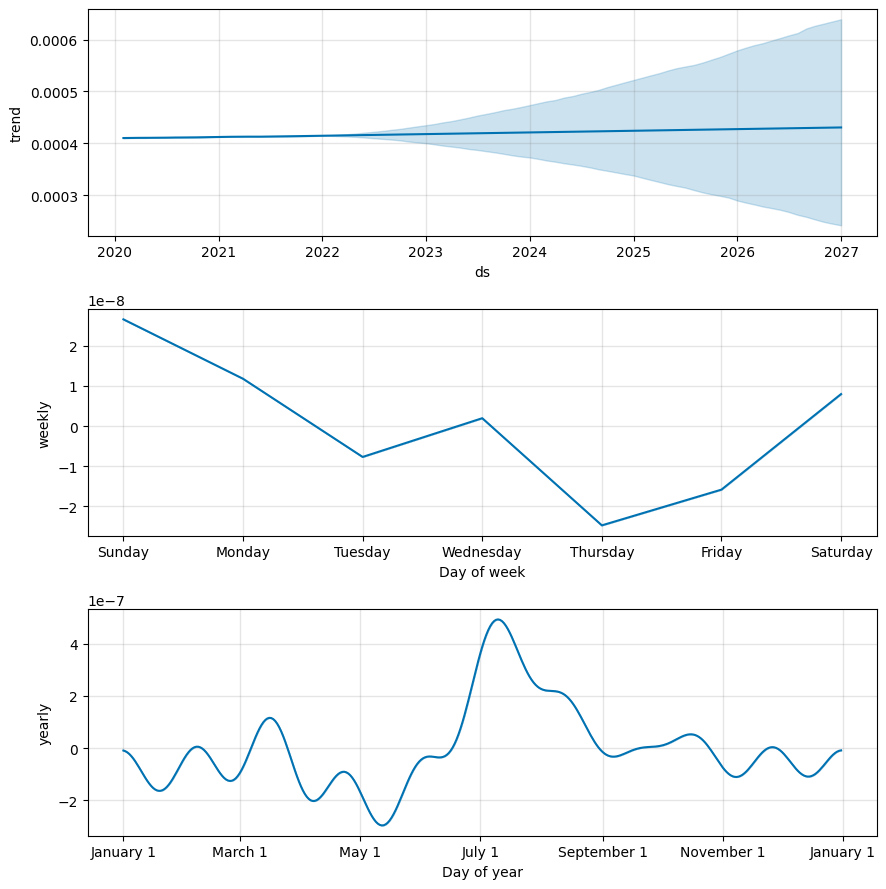

In [42]:
fig1=pro_model.plot_components(forecast)

C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


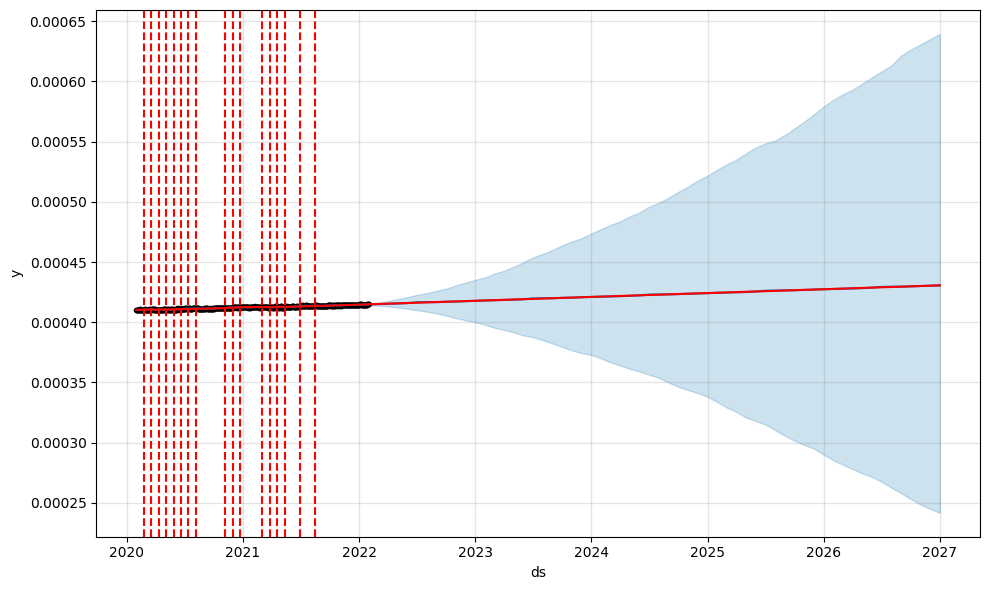

In [43]:
from prophet.plot import add_changepoints_to_plot
fig =pro_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),pro_model,forecast)

In [44]:
pro_model.changepoints

23    2020-02-24
47    2020-03-19
70    2020-04-11
93    2020-05-04
117   2020-05-28
140   2020-06-20
163   2020-07-13
187   2020-08-06
210   2020-08-29
233   2020-09-21
257   2020-10-15
280   2020-11-07
303   2020-11-30
326   2020-12-23
350   2021-01-16
373   2021-02-08
396   2021-03-03
420   2021-03-27
443   2021-04-19
466   2021-05-12
490   2021-06-05
513   2021-06-28
536   2021-07-21
560   2021-08-14
583   2021-09-06
Name: ds, dtype: datetime64[ns]

21:08:11 - cmdstanpy - INFO - Chain [1] start processing
21:08:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


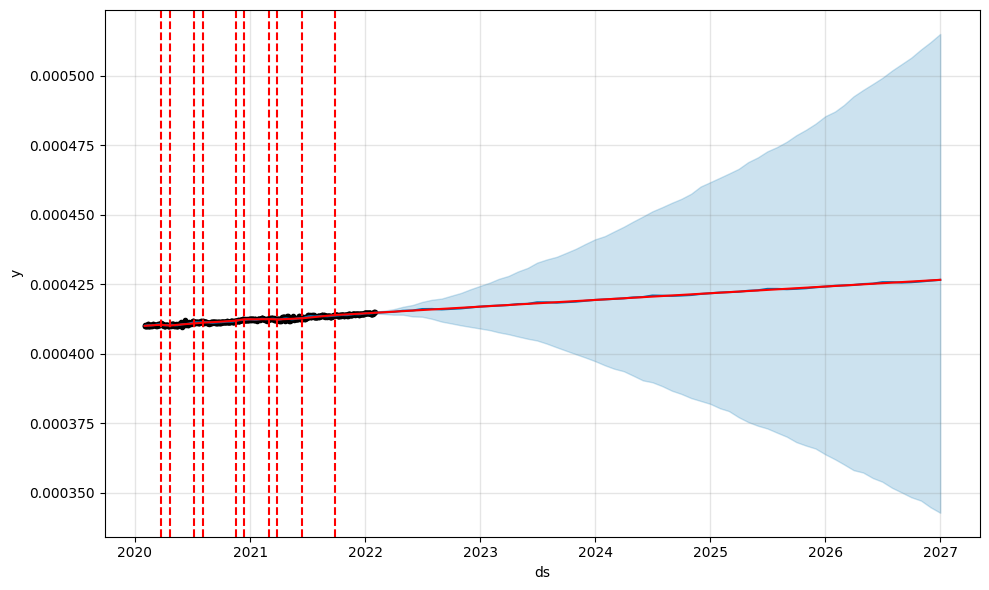

In [45]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(co2_df).predict(future_date)
fig= pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)